In [40]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg

\begin{align*}
    Q(f)
    :=
    \frac{1}{2 \pi i}
    \int_{|\lambda| = R}
    f(\lambda)
    d \lambda
\end{align*}

\begin{align*}
    Q_m(f)
    :=
    \frac{R}{m}
    \sum_{\nu=0}^{m-1}
    \omega_m^\nu f(R \omega_m^\nu),
    \quad
    \omega_m
    :=
    \exp
    \left(
        \frac{2 \pi i}{m}
    \right )
\end{align*}

In [28]:
omega = lambda m: np.exp(2 * np.pi * 1j / m)

Q_zero = lambda m, f, R: R / m * sum([
    omega(m) ** nu * f(R * omega(m) ** nu)
    for nu in range(m)
])

Q = lambda m, f, R, z: Q_zero(
    m,
    lambda x: f(x - z),
    R
)

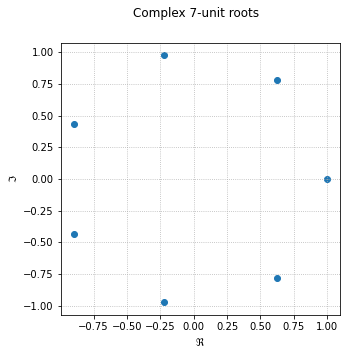

In [27]:
m = 7

fig = plt.figure(figsize = (5, 5))

plt.scatter(
    *np.array([
        [
            (omega(m) ** nu).real,
            (omega(m) ** nu).imag
        ]
        for nu in range(m)
    ]).transpose()
)

plt.grid(linestyle = ':')
plt.xlabel('$\Re$')
plt.ylabel('$\Im$')
plt.suptitle(f'Complex {m}-unit roots')

fig.show()


\begin{align*}
    A_0
    & :=
    \frac{1}{2 \pi i}
    \int_\Gamma
    A(\lambda)^{-1} \hat{V}
    d \lambda
    \in \mathbb{C}^{N \times j}, \\
    A_1
    & :=
    \frac{1}{2 \pi i}
    \int_\Gamma
    \lambda A(\lambda)^{-1} \hat{V}
    d \lambda
    \in \mathbb{C}^{N \times j}
\end{align*}

1. Berechne $A_0 \in \mathbb{C}^{N \times j}$

2. Berechne reduzierte Singulärwertzerlegung $A_0 = \tilde{V} \Sigma \tilde{W}^\ast$ mit $J$ Singulärwerten

3. Berechne $A_1 \in \mathbb{C}^{N \times j}$

4. Berechne die Eigenwerte der Matrix $\tilde{V} A_1 \tilde{W} \Sigma^{-1} \in \mathbb{C}^{j \times j}$ (z.B. mit QR-Verfahren)

In [30]:
def integral_method(A, m, R, z):

    """
    A ... matix-function
    m ... number of quadrature-nodes
    R ... ball-radius
    z ... ball-center
    """

    # constants
    j = 30
    N = 40

    # random matrix
    V_hat = np.random.random((N, j))

    # ------------------------ #
    # step 1

    # integrand of A_0
    def f_0(lamda):

        PLU = linalg.lu_factor(A(lamda))

        return np.array([
            linalg.lu_solve(PLU, V_hat[:, i])
            for i in range(j)
        ])

    A_0 = Q(m, f_0, R, z)

    # ------------------------ #
    # step 2

    V_tilde, Sigma, W_tilde = linalg.svd(A_0, full_matrices = False)

    # ------------------------ #
    # step 3

    # integrand of A_1
    f_1 = lambda lamda: lamda * f_0(lamda)

    A_1 = Q(m, f_1, R, z)

    # ------------------------ #
    # step 4

    return linalg.eig(V_tilde @ A_1 @ W_tilde @ Sigma ** -1)

array([[0.50356292, 0.25447561],
       [0.99135467, 0.91194744]])